In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#Import utilization data and perform analysis

df = pd.read_excel("data.xlsx")
df.head()

,DBResponseTime,CPUUsage,MemoryUtilizationMB
0,1.75,5.4,972
1,1.95,5.5,824
2,2.05,5.6,707
3,2.15,5.7,962
4,2.25,5.9,954


In [3]:
df.shape

(24, 3)

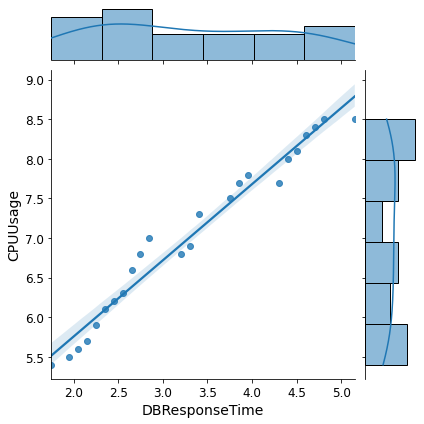

In [4]:
#Check the type of relationship between CPU Usage and DB Response Time.
sns.jointplot(x=df['DBResponseTime'], y=df['CPUUsage'], \
              data=df, kind='reg')

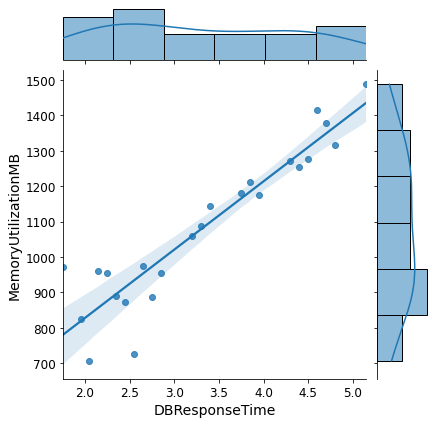

In [5]:
#Check the type of relationship between Memory Usage and DB Response Time.
sns.jointplot(x=df['DBResponseTime'], y=df['MemoryUtilizationMB'], \
              data=df, kind='reg')

In [6]:
# Create model to predict the Response Time based on CPU and Memory Utilization
X = df[['MemoryUtilizationMB','CPUUsage']] 
Y = df['DBResponseTime']
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, \
                        test_size = 0.2, random_state = 42)

In [7]:
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [8]:
# check the values predicted by model on test data.
y_prediction =  LR.predict(x_test)
y_prediction

array([2.88050548, 4.02346809, 1.99974045, 4.27077134, 3.13829663])

In [9]:
# check the accuracy of prediction
score=r2_score(y_test,y_prediction)
print("r2 score is ", score)

print('Root Mean Squared Error is =',np.sqrt(mean_squared_error(y_test,\
                                            y_prediction)))

r2 score is  0.9679128701220476
Root Mean Squared Error is = 0.16817133012028915


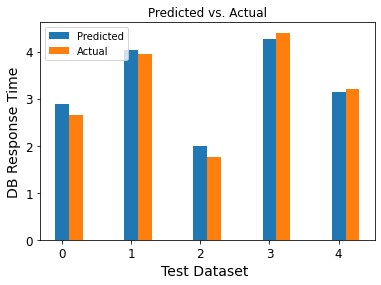

In [11]:
#Visualize the accuracy of prediction on test data
indices = np.arange(len(y_prediction))
width = 0.20
# Plotting
plt.bar(indices, y_prediction, width=width)
# Offsetting by width to shift the bars to the right
plt.bar(indices + width, y_test, width=width)
plt.xticks(ticks=indices)
plt.ylabel("DB Response Time")
plt.xlabel("Test Dataset ")
plt.title("Predicted vs. Actual")
valuesType=['Predicted','Actual']
plt.legend(valuesType,loc=2)
plt.show()